# Introduction
This project aims to explore 2 problem statements:
1. Movie Rating Prediction 

[Supervised Learning: Movie Rating Prediction](#Supervised-Learning:-Movie-Rating-Prediction)

There are so many factors influecing a move's ratings. I would like to explore some of the features, and eventually use supervised learning model to build a model to predict. 


2. Movie Reccomendation System

[Unsupervised Learning: Movie Recommendation Model](#Unsupervised-Learning:-Movie-Recommendation-Model)


Based on a user's preference, we could use unsupervised learning to generate movie reccomendations to users. 

# Supervised Learning: Movie Rating Prediction
#### Goal: Predict the Movie Rating

1. Data Preprocessing [Data Preprocessing & Introduction of Datasets](#Data-Preprocessing-&-Introduction-of-Datasets)
2. Start Training [Start training](#9.-Start-training) 


## Datasets
1. IMDB 5000 Movie Dataset https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset


# Data Preprocessing & Introduction of Datasets

In [2]:
movie = pd.read_csv('movie_metadata.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Each row represents a movie, and columns describes each movie by providing information about the movie

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

/Users/grace/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
movie = pd.read_csv('movie_metadata.csv')
movie.head()
initial_sample = movie.shape[0]

In [4]:
movie.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

We can see there are some Numerical & Catergorical Datatypes:
1. Numerical: 

num_critic_for_reviews, duration,director_facebook_likes, actor_3_facebook_likes, actor_1_facebook_likes, gross,num_voted_users, cast_total_facebook_likes, facenumber_in_poster, num_user_for_reviews, budget,title_year, actor_2_facebook_likes, imdb_score, aspect_ratio, movie_facebook_likes


2. Categorical:

Color,Director name, actor name,genres,movie_title,language,country,content_rating.

### 1. Drop useless columns: 
- movie_imdb_link

In [5]:
#Dropping the Imdb link from the dataset

movie.drop('movie_imdb_link', axis=1, inplace=True)

- color

We can see that most of the movies are color. So we will use colored films.

Then drop the color column

In [6]:
movie['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [7]:
movie = movie[movie['color'] == 'Color']

In [8]:
movie.drop('color', axis=1, inplace=True)

### 2. Check missing / NA values

In [9]:
movie.isna().any()
movie.isna().sum()

director_name                 99
num_critic_for_reviews        47
duration                      14
director_facebook_likes       99
actor_3_facebook_likes        21
actor_2_name                  12
actor_1_facebook_likes         7
gross                        797
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  21
facenumber_in_poster          12
plot_keywords                144
num_user_for_reviews          19
language                       3
country                        3
content_rating               282
budget                       468
title_year                   101
actor_2_facebook_likes        12
imdb_score                     0
aspect_ratio                 312
movie_facebook_likes           0
dtype: int64

#### Remove rows with NA:

This will result in a 10% change in sample, where our total sample is now 4529. Which is still acceptable. 

In [10]:
# We can remove the null values from the dataset where the count is less . so that we don't loose much data 

movie_new = movie.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'],inplace=True)

In [11]:
new_sample = movie.shape[0]
percentage_change = (initial_sample - new_sample)/initial_sample

#### Fill in some missing values for:

- Content_rating
- Aspect Ratio
- Budget
- Gross

#### Content Rating

We will fill in the missing values using the most common content rating R 

In [12]:
movie['content_rating'].value_counts()

R            2009
PG-13        1401
PG            656
G             107
Not Rated      79
Unrated        47
Approved       35
X              10
NC-17           6
GP              6
M               5
TV-14           3
Passed          3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [13]:
#Replacing the content rating with Value R as it has highest frequency

movie["content_rating"].fillna("R", inplace = True) 

#### Aspect Ratio

We will fill in the missing values using the median value

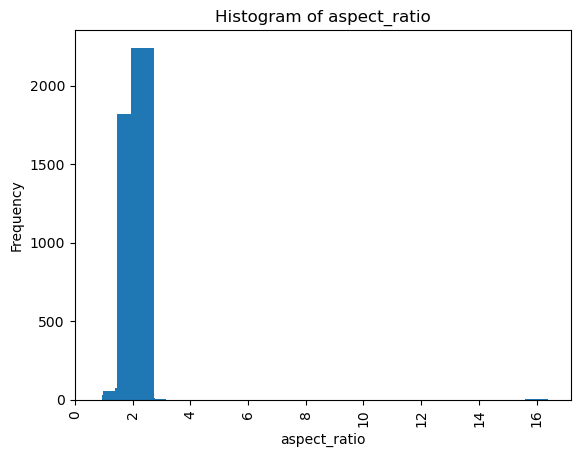

In [14]:
# Assuming you have a DataFrame df and a column named 'column_name'
value_counts = movie['aspect_ratio'].value_counts()

# Extract unique entries (index) and their corresponding frequencies (values)
unique_entries = value_counts.index
frequencies = value_counts.values

# Create the histogram
plt.bar(unique_entries, frequencies)
plt.xlabel('aspect_ratio')
plt.ylabel('Frequency')
plt.title('Histogram of aspect_ratio')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [16]:
movie["aspect_ratio"].median()

2.35

#### From the histogram above, we can see the aspect ratio = 2.35 has the highest frequency

In [15]:
movie["aspect_ratio"].fillna(movie["aspect_ratio"].median(),inplace=True)

#### Budget

We will fill in the missing values using the median value

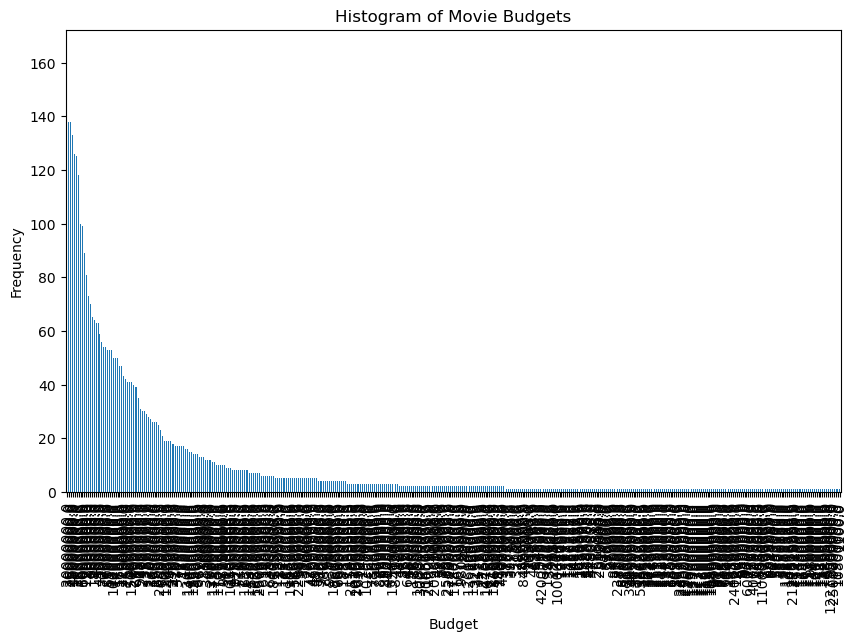

In [17]:
# Assuming you have a DataFrame df and a column named 'column_name'
value_counts = movie['budget'].value_counts()
# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
value_counts.plot(kind='bar')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Budgets')
plt.show()

movie["budget"].fillna(movie["budget"].median(),inplace=True)

#### Gross

We will fill in the missing values using the median value

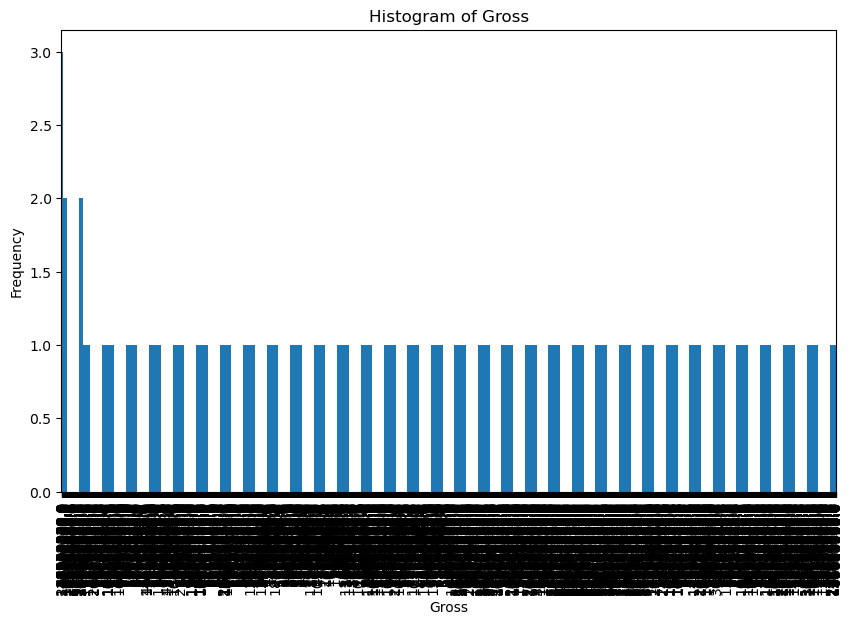

In [18]:
# Assuming you have a DataFrame df and a column named 'column_name'
value_counts = movie['gross'].value_counts()
# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
value_counts.plot(kind='bar')
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.title('Histogram of Gross')
plt.show()

movie["gross"].fillna(movie["gross"].median(),inplace=True)

#### Now we do not have anymore missing values

In [19]:
movie.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [20]:
movie

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,26589953.0,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,R,20000000.0,2013.0,470.0,7.7,2.35,84


### 3. Drop Duplicates

In [21]:
movie.drop_duplicates(inplace=True)
movie.shape

(4489, 26)

### 4. Generate new data

- Profit

Profit, derived from gross - budget

- Profit Percentage

(Profit / gross) * 100

In [22]:
movie['profit'] = movie['gross'] - movie['budget']

In [23]:
movie['profit_percentage'] = (movie['profit'] / movie['gross']) * 100

### 5. Encode

- Country
- Language
- Content Rating
- Genres

#### Country

- Most of them are from USA and UK. Hence, we divide them to USA, UK and others
- then encode them to 0,1,2

In [24]:
value_counts = movie["country"].value_counts()

In [25]:
vals = value_counts[:2].index
print (vals)
movie['country'] = movie.country.where(movie.country.isin(vals), 'other')

Index(['USA', 'UK'], dtype='object')


In [26]:
movie["country"].value_counts()

USA      3421
other     668
UK        400
Name: country, dtype: int64

In [27]:
movie['country_encoded'] = movie['country'].apply(lambda x: 0 if x == 'USA' else (1 if x == 'UK' else 2))

In [28]:
movie['country_encoded'].value_counts()

0    3421
2     668
1     400
Name: country_encoded, dtype: int64

#### Language

- Most of them are English. We will divide the movies to English, French, Spanish and others
- Encode them to 0,1,2,3

In [29]:
vc2 = movie["language"].value_counts()

In [30]:
vals = vc2[:3].index
print (vals)
movie['language'] = movie.language.where(movie.language.isin(vals), 'other')

Index(['English', 'French', 'Spanish'], dtype='object')


In [31]:
movie['lan_encoded'] = movie['language'].apply(lambda x: 0 if x == 'English' else (1 if x == 'French' else (2 if x == 'Spanish' else 3)))

#### Genres

We can see that one movie can have many genres. However, we will pick the first genre as the main genre. 

Then we will encode the genres from 0 - 18

In [31]:
movie['genres'].value_counts()

Drama                                               201
Comedy                                              178
Comedy|Drama|Romance                                178
Comedy|Drama                                        173
Comedy|Romance                                      146
                                                   ... 
Action|Adventure|Drama|Thriller|Western               1
Action|Biography|Drama                                1
Action|Adventure|Drama|Fantasy|War                    1
Adventure|Animation|Comedy|Fantasy|Music|Romance      1
Comedy|Crime|Horror                                   1
Name: genres, Length: 844, dtype: int64

In [32]:
movie['first_genre'] = movie['genres'].str.split('|').str[0]


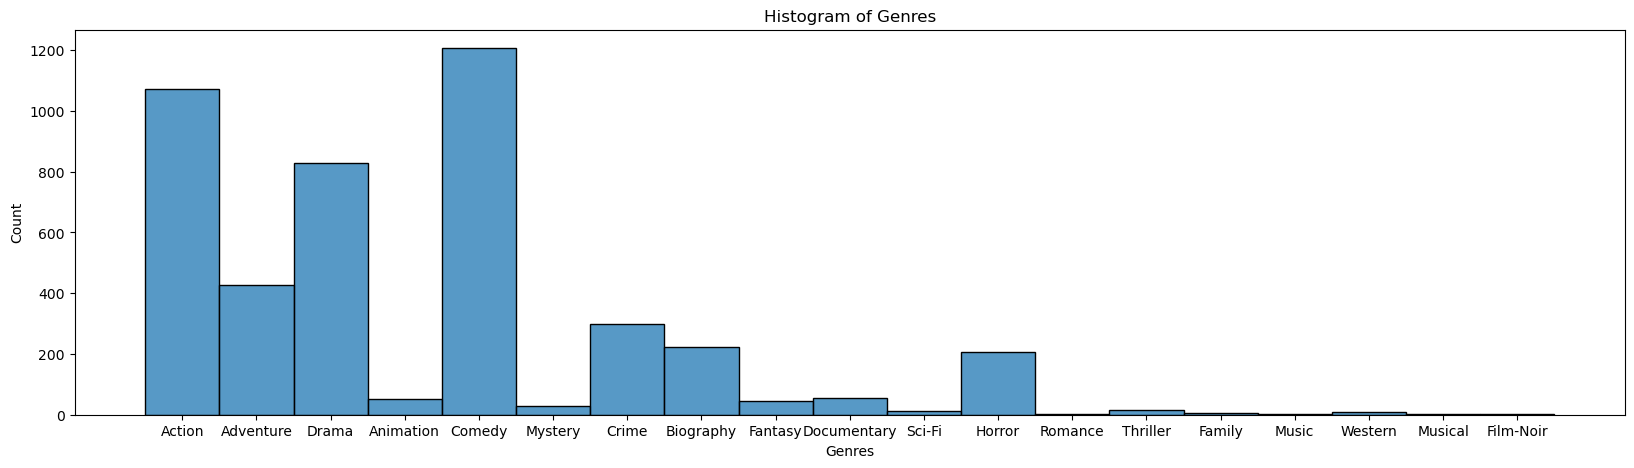

In [33]:

plt.figure(figsize=(20, 5)) 
# Replace 'column_name' with the actual column name you want to plot
sns.histplot(movie['first_genre'], bins=10, kde=False)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Histogram of Genres')
plt.show()


In [34]:
movie['first_genre'].value_counts()

Comedy         1207
Action         1071
Drama           827
Adventure       426
Crime           298
Biography       223
Horror          208
Documentary      54
Animation        53
Fantasy          45
Mystery          30
Thriller         15
Sci-Fi           11
Western          10
Family            5
Musical           3
Romance           1
Music             1
Film-Noir         1
Name: first_genre, dtype: int64

In [35]:
genre_mapping = {
    'Comedy': 0,
    'Action': 1,
    'Drama': 2,
    'Adventure': 3,
    'Crime': 4,
    'Biography': 5,
    'Horror': 6,
    'Documentary': 7,
    'Animation': 8,
    'Fantasy': 9,
    'Mystery': 10,
    'Thriller': 11,
    'Sci-Fi': 12,
    'Western': 13,
    'Family': 14,
    'Musical': 15,
    'Romance': 16,
    'Music': 17,
    'Film-Noir': 18
}
movie['genre_encoded'] = movie['first_genre'].replace(genre_mapping)

#### content rating 
- encode

In [36]:
movie['content_rating'].value_counts()

R            2146
PG-13        1385
PG            653
G             107
Not Rated      79
Unrated        47
Approved       35
X              10
NC-17           6
GP              6
M               5
TV-14           3
Passed          3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [37]:
rating_mapping = {
    'R': 0,
    'PG-13': 1,
    'PG': 2,
    'G': 3,
    'Not Rated': 4,
    'Unrated': 5,
    'Approved': 6,
    'X': 7,
    'NC-17': 8,
    'GP': 9,
    'M': 10,
    'TV-14': 11,
    'Passed': 12,
    'TV-G': 13,
    'TV-PG': 14
}
movie['rating_encoded'] = movie['content_rating'].map(rating_mapping)

In [38]:
movie['rating_encoded'].value_counts()

0     2146
1     1385
2      653
3      107
4       79
5       47
6       35
7       10
8        6
9        6
10       5
11       3
12       3
13       3
14       1
Name: rating_encoded, dtype: int64

### 6. Correlation Matrix of selected columns

We do not want our chosen features to be highly correlated to each other.

In [39]:
selected_cols = ['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 
       'actor_1_facebook_likes', 'gross', 
        'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster',
       'num_user_for_reviews',
       'budget',  'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'profit', 'profit_percentage',
       'country_encoded', 'lan_encoded', 'first_genre', 'genre_encoded','rating_encoded']

In [40]:
sel_movie = movie[selected_cols]

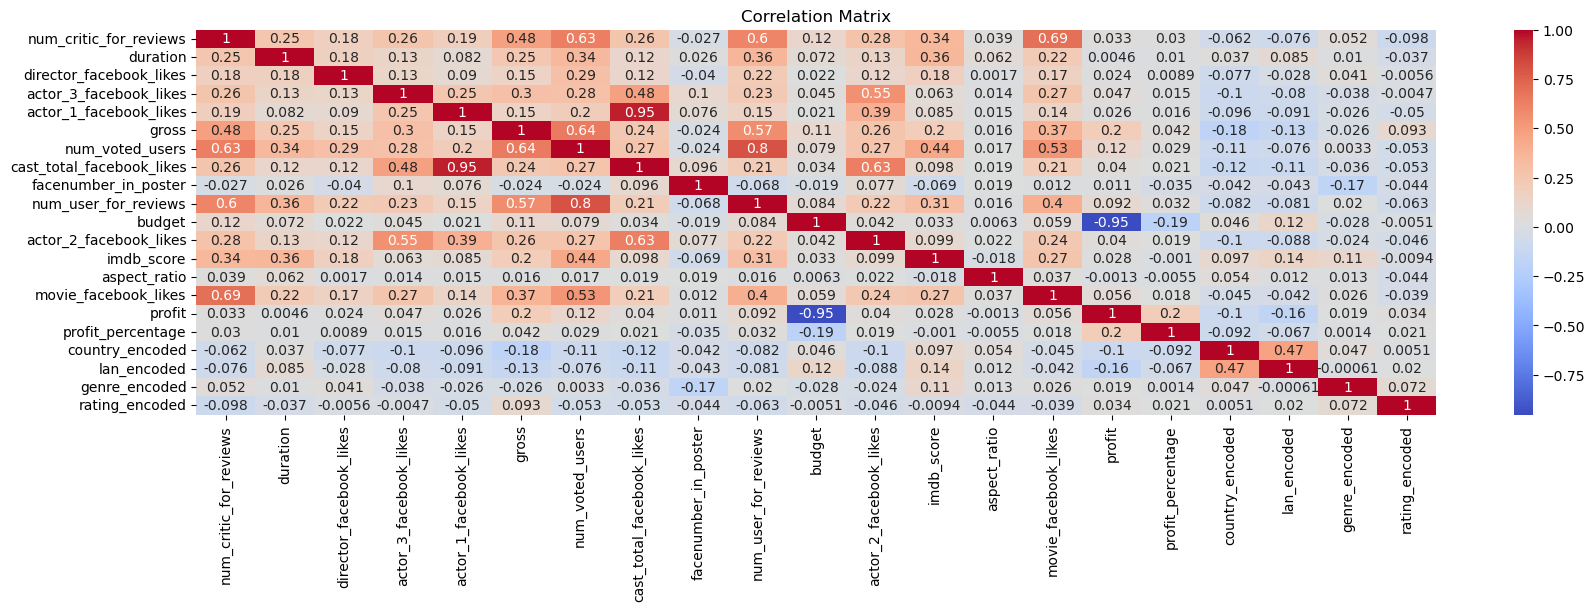

In [41]:

correlation_matrix = sel_movie.corr()

# Create a figure and axis
plt.figure(figsize=(20, 5))  # Adjust the figure size as needed

# Create a heatmap with color
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Set plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [42]:
selected_cols = ['duration',
       'director_facebook_likes', 'total_fb_likes', 
        'gross', 
        'num_voted_users',
       'facenumber_in_poster',
       'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'profit', 'profit_percentage',
       'country_encoded', 'lan_encoded', 'first_genre', 'genre_encoded','rating_encoded','total_fb_likes']

#### 1. Budget and Profit are highly correlated. Hence, we shall only include profit in our model. 

#### 2. All the 3 actors facebook likes seem to be highly correlated as well. Hence, we can add a column that sums up all the likes. 

In [43]:
sel_movie['total_fb_likes']=sel_movie["actor_2_facebook_likes"] + sel_movie['actor_3_facebook_likes']+ sel_movie['actor_1_facebook_likes']

/var/folders/hl/c4yhlzd535b9vl5bpjwx_wd00000gn/T/ipykernel_86043/2001184199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_movie['total_fb_likes']=sel_movie["actor_2_facebook_likes"] + sel_movie['actor_3_facebook_likes']+ sel_movie['actor_1_facebook_likes']


We can finalise to the following columns:

In [44]:
selected_cols = ['duration',
       'director_facebook_likes', 'total_fb_likes', 
        'gross', 
        'num_voted_users',
       'facenumber_in_poster',
       'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'profit', 'profit_percentage',
       'country_encoded', 'lan_encoded', 'genre_encoded','rating_encoded']

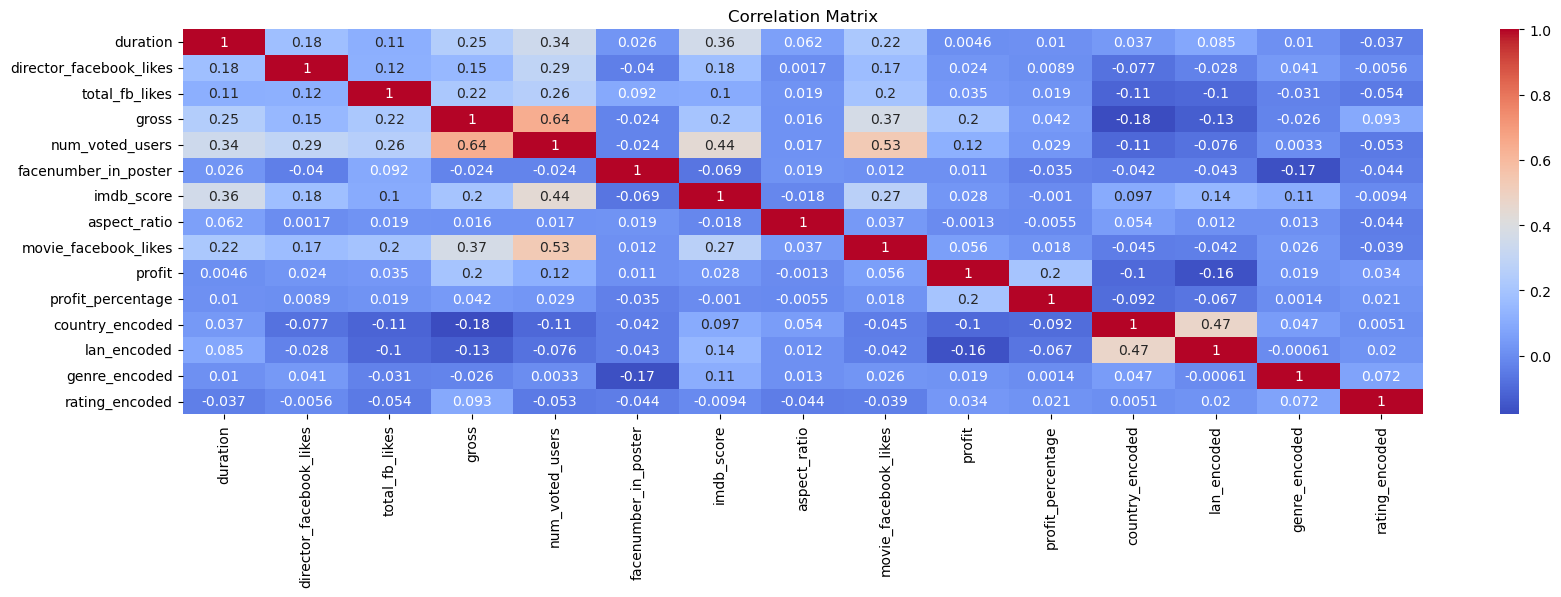

In [45]:
correlation_matrix = sel_movie[selected_cols].corr()

# Create a figure and axis
plt.figure(figsize=(20, 5))  # Adjust the figure size as needed

# Create a heatmap with color
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Set plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

#### We can see the that features now are not much correlated to each other. <0.7

In [46]:
data = sel_movie[selected_cols]
data

,duration,director_facebook_likes,total_fb_likes,gross,num_voted_users,facenumber_in_poster,imdb_score,aspect_ratio,movie_facebook_likes,profit,profit_percentage,country_encoded,lan_encoded,genre_encoded,rating_encoded
0,178.0,0.0,2791.0,760505847.0,886204,0.0,7.9,1.78,33000,523505847.0,68.836532,0,0,1,1
1,169.0,563.0,46000.0,309404152.0,471220,0.0,7.1,2.35,0,9404152.0,3.039439,0,0,1,1
2,148.0,0.0,11554.0,200074175.0,275868,1.0,6.8,2.35,85000,-44925825.0,-22.454585,1,0,1,1
3,164.0,22000.0,73000.0,448130642.0,1144337,0.0,8.5,2.35,164000,198130642.0,44.212697,0,0,1,1
5,132.0,475.0,1802.0,73058679.0,212204,1.0,6.6,2.35,24000,-190641321.0,-260.942743,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,80.0,0.0,0.0,70071.0,589,0.0,6.3,2.35,74,63071.0,90.010133,2,0,11,4
5035,81.0,0.0,147.0,2040920.0,52055,0.0,6.9,1.37,0,2033920.0,99.657017,0,2,1,0
5037,95.0,0.0,634.0,4584.0,1338,1.0,6.4,2.35,413,-4416.0,-96.335079,0,0,0,4
5038,87.0,2.0,1425.0,26589953.0,629,2.0,7.7,2.35,84,6589953.0,24.783620,2,0,0,0


### 7. Convert target feature to classes
For ease of classification, we will split our imdb scores to classes: 
1. Bad
2. Average
3. Good
4. Excellent

This is so that we can model the problem into a classification problem. 
Our rubrics to convert scores to classes is as follow:

| Scores | Score Category |
|--------|----------------|
|   0-4  |      Bad       |
|   4-6  |    Average     |
|   6-8  |      Good      |
|  8-10  |   Excellent    |


In [50]:
bins = [0, 4, 6, 8, 10]
labels = ['Bad', 'Average', 'Good', 'Excellent']

# Create a new column 'quality' based on the 'imdb_score' ranges
data['quality'] = pd.cut(data['imdb_score'], bins=bins, labels=labels, include_lowest=True)
#encode it
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'movie' with the 'quality' column
label_encoder = LabelEncoder()
data['quality_encoded'] = label_encoder.fit_transform(data['quality'])

# Display the updated DataFrame
data['quality_encoded'].value_counts()



/var/folders/hl/c4yhlzd535b9vl5bpjwx_wd00000gn/T/ipykernel_86043/441791754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quality'] = pd.cut(data['imdb_score'], bins=bins, labels=labels, include_lowest=True)
/var/folders/hl/c4yhlzd535b9vl5bpjwx_wd00000gn/T/ipykernel_86043/441791754.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quality_encoded'] = label_encoder.fit_transform(data['quality'])


3    2865
0    1302
2     168
1     154
Name: quality_encoded, dtype: int64

### 8. Split data

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import auc,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [52]:
y=data['quality_encoded']
X_cols = ['duration',
       'director_facebook_likes', 'total_fb_likes', 
        'gross','num_voted_users',
       'facenumber_in_poster',
       'aspect_ratio', 'movie_facebook_likes', 'profit', 'profit_percentage',
       'country_encoded', 'lan_encoded','genre_encoded','rating_encoded']
        
X = data[X_cols]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

### 9. Start training
I've included 6 training models:
1. Naive Bayes
2. Random Forest
3. SVC
4. KNN
5. Decision Tree
6. Gradient Boosting

/Users/grace/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/grace/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/grace/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other red

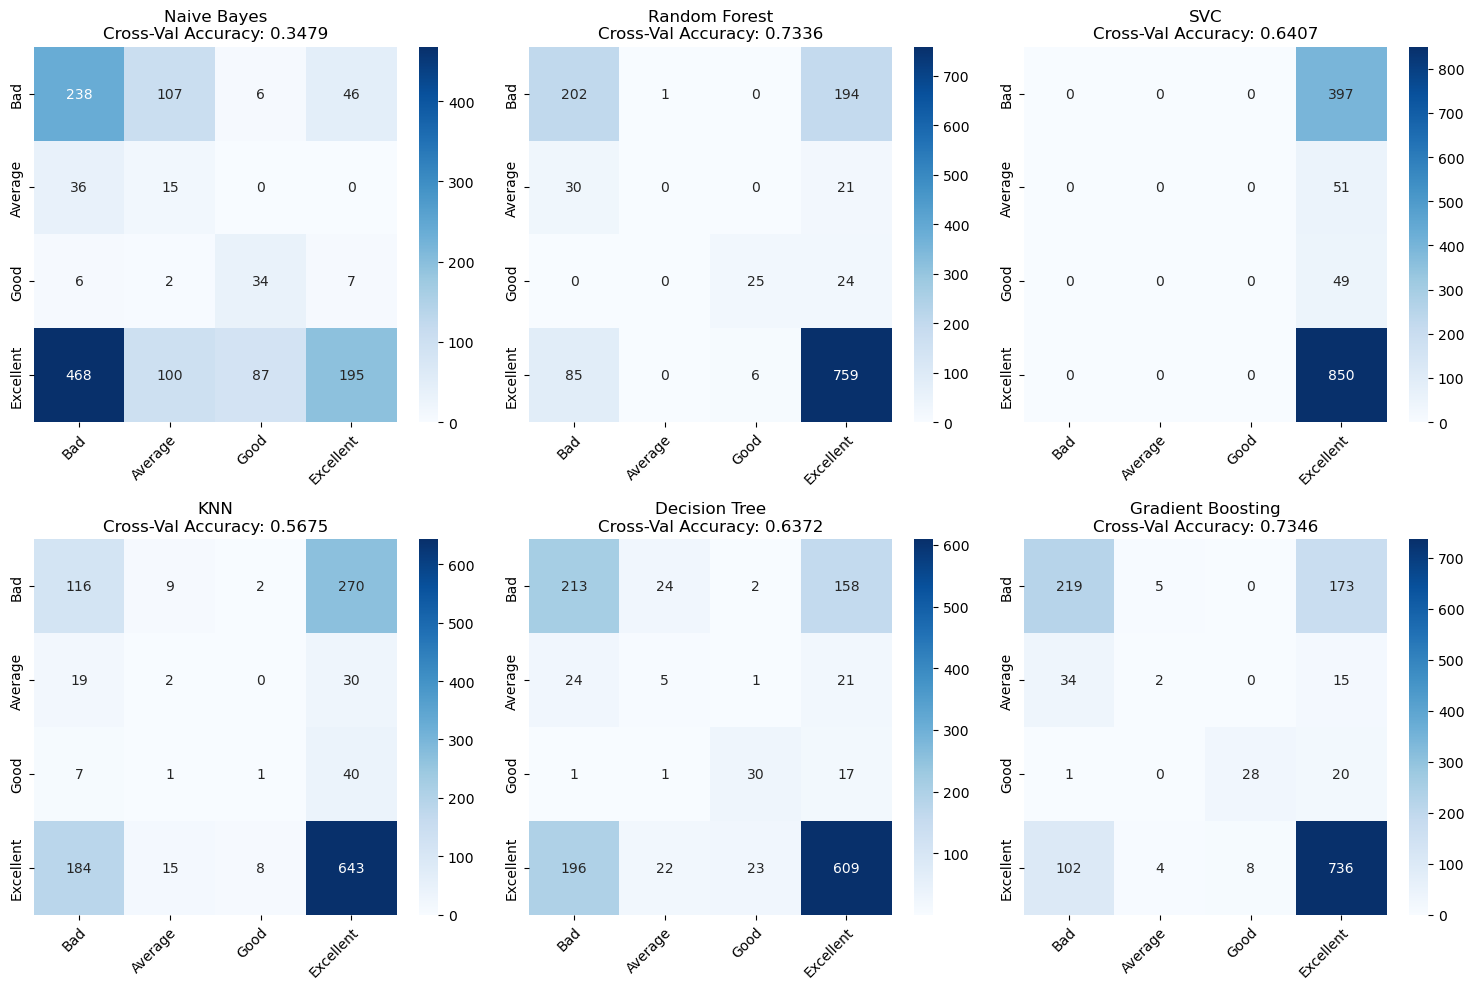

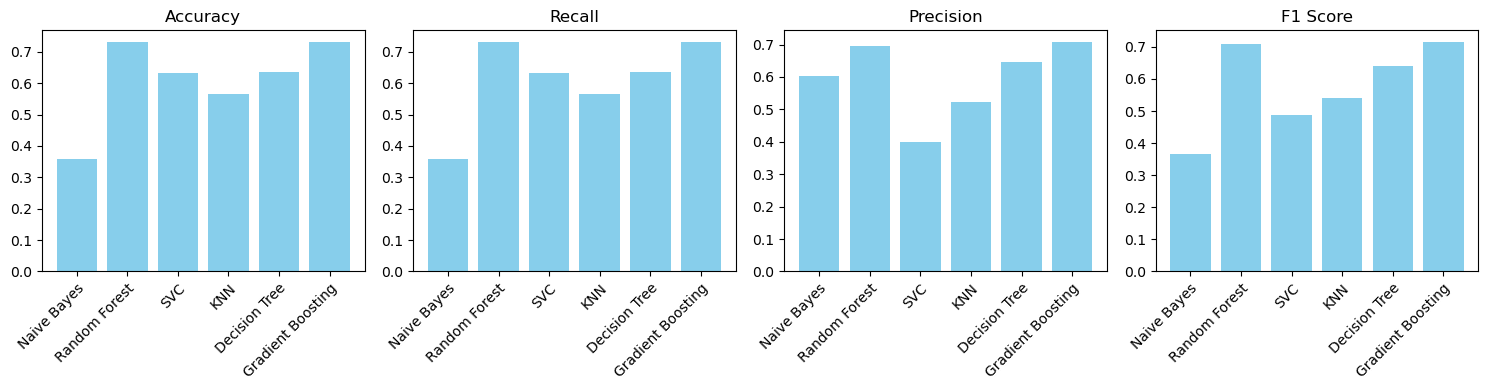

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Initialize classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Lists to store metrics for comparison
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

# Loop through classifiers
for (name, clf), ax in zip(classifiers.items(), axes.flatten()):
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,xticklabels=['Bad', 'Average', 'Good', 'Excellent'],
                yticklabels=['Bad', 'Average', 'Good', 'Excellent'])
    ax.set_title(name + f'\nCross-Val Accuracy: {cv_scores.mean():.4f}')
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Calculate and store metrics for comparison
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Adjust layout
plt.tight_layout()

# Plot bar charts for metrics comparison with numbers above the bars
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
values = [accuracy_scores, recall_scores, precision_scores, f1_scores]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

for metric, values, ax in zip(metrics, values, axes):
    bars = ax.bar(classifiers.keys(), values, color='skyblue')
    ax.set_title(metric)
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


plt.tight_layout()
plt.show()


### 10. Class Imbalance
We apply SMOTE to balance out our classes and train with the new data

In [54]:
print("\nClass distribution before SMOTE is imbalanced:\n", pd.Series(y_train).value_counts())


Class distribution before SMOTE is imbalanced:
 3    2015
0     905
2     119
1     103
Name: quality_encoded, dtype: int64


In [55]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display class distribution after applying SMOTE
print("\nClass distribution after SMOTE becomes more balanced:\n", pd.Series(y_train_resampled).value_counts())


Class distribution after SMOTE becomes more balanced:
 3    2015
0    2015
1    2015
2    2015
Name: quality_encoded, dtype: int64


/Users/grace/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/grace/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

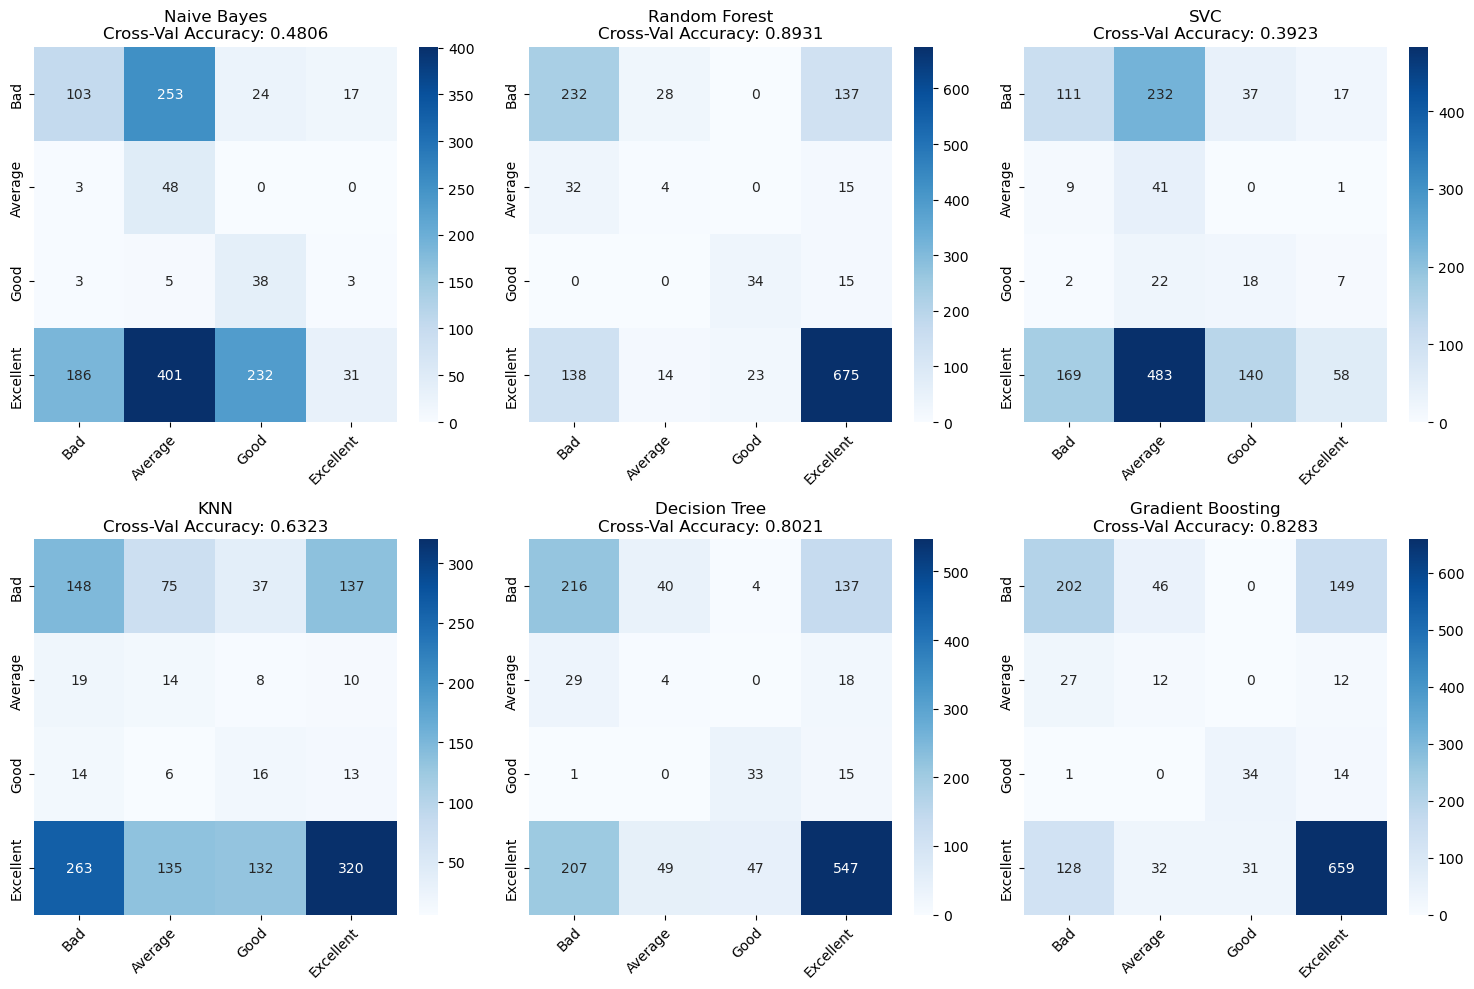

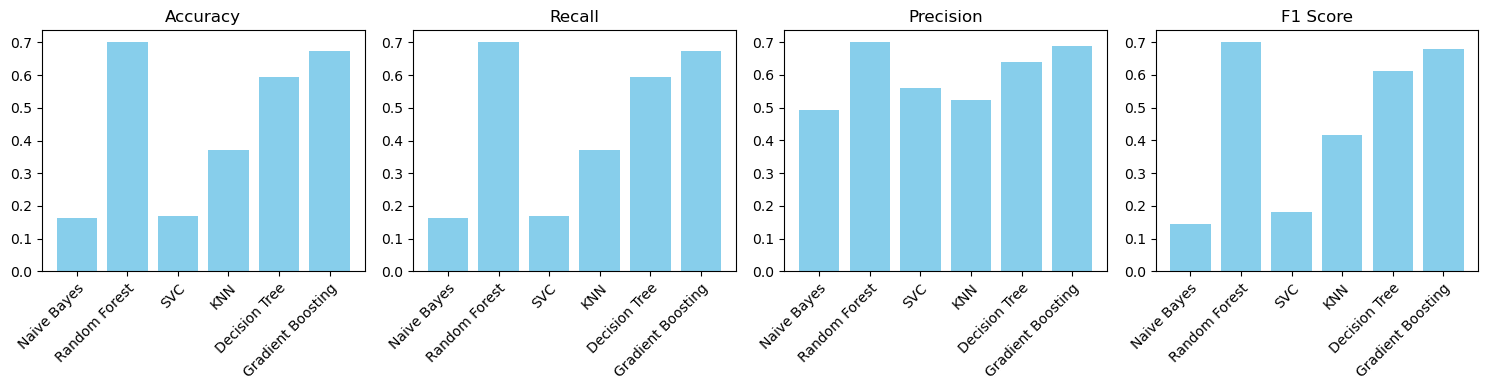

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Initialize classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Lists to store metrics for comparison
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

# Loop through classifiers
for (name, clf), ax in zip(classifiers.items(), axes.flatten()):
    # Train the model
    clf.fit(X_train_resampled, y_train_resampled)
    
    cv_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,xticklabels=['Bad', 'Average', 'Good', 'Excellent'],
                yticklabels=['Bad', 'Average', 'Good', 'Excellent'])
    ax.set_title(name + f'\nCross-Val Accuracy: {cv_scores.mean():.4f}')
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Calculate and store metrics for comparison
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Adjust layout
plt.tight_layout()

# Plot bar charts for metrics comparison with numbers above the bars
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
values = [accuracy_scores, recall_scores, precision_scores, f1_scores]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

for metric, values, ax in zip(metrics, values, axes):
    bars = ax.bar(classifiers.keys(), values, color='skyblue')
    ax.set_title(metric)
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


plt.tight_layout()
plt.show()


## Random Forest (RF) performs best before & after SMOTE with highest CV Score 
We can take a look at RF before and after resampling:

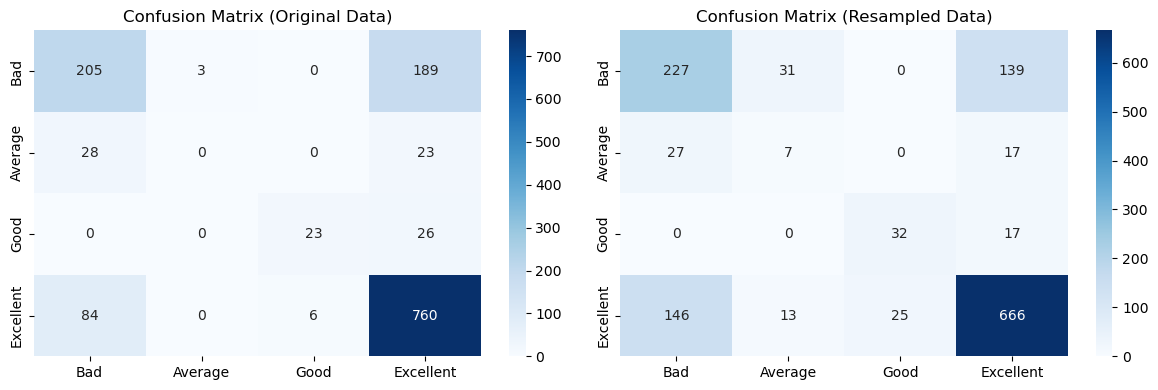

Original RF:
               precision    recall  f1-score   support

           0       0.65      0.52      0.57       397
           1       0.00      0.00      0.00        51
           2       0.79      0.47      0.59        49
           3       0.76      0.89      0.82       850

    accuracy                           0.73      1347
   macro avg       0.55      0.47      0.50      1347
weighted avg       0.70      0.73      0.71      1347

Resampled RF:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57       397
           1       0.14      0.14      0.14        51
           2       0.56      0.65      0.60        49
           3       0.79      0.78      0.79       850

    accuracy                           0.69      1347
   macro avg       0.51      0.54      0.52      1347
weighted avg       0.69      0.69      0.69      1347



In [52]:
#Random Forest:
# Train a Random Forest model on the original training data
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)

# Train a Random Forest model on the resampled training data
clf_resampled = RandomForestClassifier(random_state=42)
clf_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set for both models
y_pred_original = clf_original.predict(X_test)
y_pred_resampled = clf_resampled.predict(X_test)

# Plot confusion matrix and bar chart side-by-side for the models
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot confusion matrix for the model trained on original data
sns.heatmap(confusion_matrix(y_test, y_pred_original), annot=True, fmt='d', cmap='Blues', ax=axes[0],xticklabels=['Bad', 'Average', 'Good', 'Excellent'],
                yticklabels=['Bad', 'Average', 'Good', 'Excellent'])
axes[0].set_title('Confusion Matrix (Original Data)')

# Plot confusion matrix for the model trained on resampled data
sns.heatmap(confusion_matrix(y_test, y_pred_resampled), annot=True, fmt='d', cmap='Blues', ax=axes[1],xticklabels=['Bad', 'Average', 'Good', 'Excellent'],
                yticklabels=['Bad', 'Average', 'Good', 'Excellent'])
axes[1].set_title('Confusion Matrix (Resampled Data)')

plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report
print('Original RF:\n',classification_report(y_test, y_pred_original))
print('Resampled RF:\n',classification_report(y_test, y_pred_resampled))

#### Resampled data might have a drop in general accuracy. However, looking at individual classes, the average and good movies performed better. 

### Therefore, we conclude that Resampling + Random Forest works best. 

# Unsupervised Learning: Movie Recommendation Model
## Datasets
We will use the same dataset: <br>
IMDB 5000 Movie Dataset https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

#### Goal: Build a movie reccomendation model

1. PCA method
[PCA method](#1.-PCA-method)

2. K means clustering 
[K means clustering method](#2.-K-Means-Clustering-method)

In [60]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#### Since we will be using text analysis, we clean the movie_title & plot keywords

In [57]:
movie2 = movie
movie2['movie_title'] = movie2['movie_title'].str.replace('\xa0', '')
movie2['plot_keywords_modified'] = movie2['plot_keywords'].str.replace('|', ' ')
movie2.reset_index(drop=True, inplace=True)

/var/folders/hl/c4yhlzd535b9vl5bpjwx_wd00000gn/T/ipykernel_86043/156650967.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie2['plot_keywords_modified'] = movie2['plot_keywords'].str.replace('|', ' ')


### 1. PCA method
This method deals with the nature of the movie mostly, analysing the director, actors plot keywords and some numerical features. It does not take into account which movies the user has already watched or rated
1. Use PCA to add the PCA components ('pca_component1' and 'pca_component2') to the original DataFrame, representing the original numerical features in a more compact form. This reduced representation can be useful for various purposes, such as visualization or further analysis.

2. Text Similarity using Cosine Similarity 
3. Get the movies that has highest similarity in both textual and numerical data

In [84]:
numerical_features = ['budget', 'gross', 'imdb_score']

# Standardize numerical features before applying PCA
movies_standardized = (movie2[numerical_features] - movie2[numerical_features].mean()) / movie2[numerical_features].std()
movies_standardized.fillna(0, inplace=True)  # Fill NaN with 0

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(movies_standardized)

# Add PCA components to the original DataFrame
movie2['pca_component1'] = pca_result[:, 0]
movie2['pca_component2'] = pca_result[:, 1]

# Step 2: Content-Based Filtering using TF-IDF and Cosine Similarity
# Combine relevant text features for content-based filtering
text_features = ['first_genre', 'actor_2_name', 'actor_1_name','actor_3_name', 'director_name','plot_keywords_modified']

# Concatenate text features into a single string
movie2['combined_text'] = movie2[text_features].apply(lambda x: ' '.join(x), axis=1)

# Create a TF-IDF Vectorizer for the combined text
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movie2['combined_text'])

# Calculate the cosine similarity between movies based on text features
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_movie_recommendations(movie_title, pca_result=pca_result, cosine_sim=cosine_sim, movies=movie2):
    # Get the index of the movie
    idx = movie2.index[movie2['movie_title'] == movie_title].tolist()[0]

    # Get the PCA components for the input movie
    pca_components_input = pca_result[idx]

    # Get the pairwise similarity scores based on PCA components
    pca_sim_scores = np.dot(pca_result, pca_components_input)

    # Get the pairwise similarity scores based on text features
    text_sim_scores = cosine_sim[idx]

    # Combine the similarity scores (you can adjust the weights as needed)
    combined_sim_scores = 0.7 * pca_sim_scores + 0.3 * text_sim_scores

    # Sort the movies based on combined similarity scores
    sim_scores = list(enumerate(combined_sim_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 5 similar movies (excluding the input movie itself)
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 recommended movies
    return movies['movie_title'].iloc[movie_indices]



0               Avatar
3583    Lady Vengeance
25             Titanic
16        The Avengers
28      Jurassic World
Name: movie_title, dtype: object


Here, tfidf_matrix is the TF-IDF matrix representing the textual features of each movie. The linear_kernel function computes the linear kernel (dot product) between the rows of tfidf_matrix, which is equivalent to the cosine similarity when the vectors are normalized.

The resulting cosine_sim matrix is a square matrix where each element (i, j) represents the cosine similarity between movie i and movie j. The diagonal elements (where i == j) represent the similarity of a movie with itself and are always 1. The values range from -1 to 1, where 1 indicates identical texts, 0 indicates no similarity, and -1 indicates dissimilarity.

In [87]:
# Example: Recommend movies similar to 'Movie A'
recommendations = get_movie_recommendations('Harry Potter and the Half-Blood Prince')
print(recommendations)

0               Avatar
3583    Lady Vengeance
25             Titanic
16        The Avengers
28      Jurassic World
Name: movie_title, dtype: object


### 2. K Means Clustering method

In [78]:
movie2['genre_encoded'].value_counts()

0     1207
1     1071
2      827
3      426
4      298
5      223
6      208
7       54
8       53
9       45
10      30
11      15
12      11
13      10
14       5
15       3
16       1
17       1
18       1
Name: genre_encoded, dtype: int64

#### First use Elbow Method to find an optimal k clusters:

In [94]:
k_values = [i for i in range(2,18)]
k_values
inertias = []
for i in range(2,18):
    n_clusters = i # You can adjust the number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(df[features_for_clustering])
    k = kmeans.inertia_
    inertias.append(k)

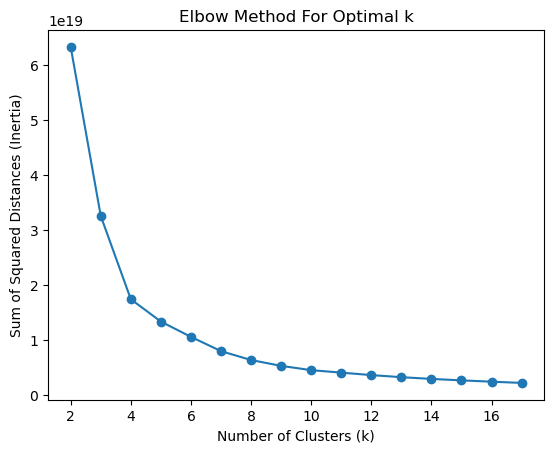

In [95]:
# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


#### We can set k = 16

In [97]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load your data
df = movie2

# Select relevant features for clustering and recommendations
features_for_clustering = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'gross',
                           'num_voted_users', 'facenumber_in_poster', 'num_user_for_reviews',
                           'budget', 'imdb_score', 'actor_2_facebook_likes', 'title_year',
                           'movie_facebook_likes', 'profit_percentage','genre_encoded','rating_encoded','country_encoded','lan_encoded']

# # Standardize the features
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df[features_for_clustering])

# Apply K-Means clustering
n_clusters = 16  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features_for_clustering])

def get_movie_recommendationsK(movie_title, df=df):
    # Get the cluster of the liked movie
    movie_cluster = df.loc[df['movie_title'] == movie_title, 'cluster'].values[0]

    # Filter movies from the same cluster
    cluster_movies = df[df['cluster'] == movie_cluster].reset_index(drop=True)

    # Exclude the liked movie itself
    cluster_movies = cluster_movies[cluster_movies['movie_title'] != movie_title]

    # Return the top 5 recommended movies from the cluster
    return cluster_movies['movie_title'].head(5)



In [98]:
# Example: Recommend movies similar to 'Avatar'
recommendations = get_movie_recommendationsK('Harry Potter and the Half-Blood Prince')
print(recommendations)

0    Pirates of the Caribbean: At World's End
1                       The Dark Knight Rises
2                                Spider-Man 3
3                     Avengers: Age of Ultron
5          Batman v Superman: Dawn of Justice
Name: movie_title, dtype: object
